### Złożoność

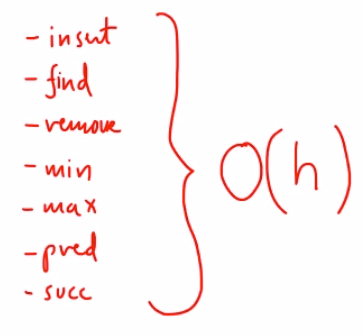

### Implementacja struktury

In [1]:
class BSTNode:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    @property
    def min(self):
        return self.min_child(self.root)
        
    @property
    def max(self):
        return self.max_child(self.root)
        
    def insert(self, key, val):
        node = BSTNode(key, val)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    def find(self, key):
        curr = self.root
        while curr:
            # Enter the left subtree
            if key < curr.key:
                curr = curr.left
            # Enter the right subtree
            elif key > curr.key:
                curr = curr.right
            # Return a node which was found
            else:
                return curr
        # If no node of the specified key was found, return None
        return None
    
    @staticmethod
    def min_child(node):
        while node.left:
            node = node.left
        # Return a node of the minimum key
        return node
    
    @staticmethod
    def max_child(node):
        while node.right:
            node = node.right
        # Return a node of the maximum key
        return node
    
    def successor(self, node):
        if node.right:
            return self.min_child(node.right)
        while node.parent:
            if node.parent.left == node:
                return node.parent
            node = node.parent
        return None
        
    def predecessor(self, node):
        if node.left:
            return self.max_child(node.left)
        while node.parent:
            if node.parent.right == node:
                return node.parent
            node = node.parent
        return None
        
    def remove(self, key):
        # Find a node which will be removed
        node = self.find(key)
        # Return None if no node with the specified key was found
        if not node: return None
        # Remove a node and fix a BST
        self._remove_node(node)
        return node
        
    def update(self, key, val):
        node = self.find(key)
        if not node: raise KeyError(f'Invalid key: {key}')
        node.val = val
        
    def _remove_node(self, node):
        # If the current node has no right child
        # (and might not have a left child)
        if not node.right:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.left
                else:
                    node.parent.left = node.left
                if node.left:
                    node.left.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.left
                if self.root: self.root.parent = None
                
        # If the current node has no left child
        # (and might not have a right child)
        elif not node.left:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.right
                else:
                    node.parent.left = node.right
                if node.right:
                    node.right.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.right
                if self.root: self.root.parent = None
                
        # If the current node has both children
        else:
            new_node = self.successor(node)
            self._remove_node(new_node)
            
            if node is self.root:
                self.root = new_node
            elif node.parent.right is node:
                node.parent.right = new_node
            else:
                node.parent.left = new_node
                
            new_node.left   = node.left
            new_node.right  = node.right
            new_node.parent = node.parent
            if node.right: node.right.parent = new_node
            if node.left:  node.left.parent  = new_node    
        
        node.parent = node.left = node.right = None

##### Pomocnicze

In [2]:
def binary_tree_string(tree_root, *, fn=lambda node: node.val):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

In [3]:
t = BST()

for v in ['owoce', 'warzywa', 'pieczywo', 'mięso', 'napoje', 'zwierzęce', 'słodycze', 'gotowe dania']:
    t.insert(v, None)
    print(binary_tree_string(t.root, fn=lambda n: n.key))
    print('\n\n')
    
s = t.min_child(t.root)
while s:
    print(s.key)
    s = t.successor(s)

owoce



      owoce 
           \
          warzywa



                owoce  
                        \
                         warzywa 
                         /       
                    pieczywo          



                owoce  
             /          \
      mięso              warzywa 
                         /       
                    pieczywo          



                owoce  
             /          \
      mięso              warzywa 
            \            /       
           napoje   pieczywo          



                    owoce  
               /             \
        mięso                  warzywa 
              \               /       \
              napoje     pieczywo   zwierzęce



                                            owoce  
                                 /                         \
                    mięso                                          warzywa 
                             \                                 /             \
        

###### Kilka testów

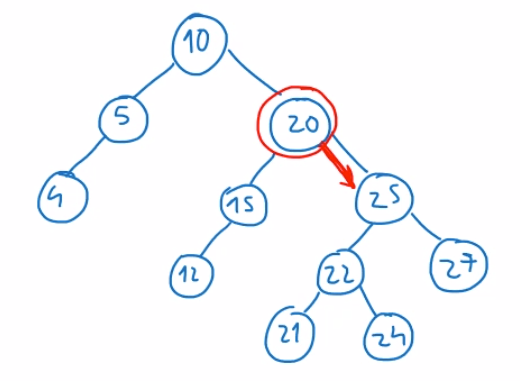

In [4]:
t = BST()
# Przy zmienionej kolejności elementów, możemy uzyskać inne drzewo, ale zawsze będzie ono spełniać
# warunki drzewa BST, czyli wszystkie klucze w lewym poddrzewie danego danego węzła będą mniejsze od
# niego, natomiast wszystkie klucze w prawym poddrzewie od niego większe
for n in (10, 5, 20, 4, 15, 25, 12, 22, 21, 24, 27):  
    t.insert(n, [])

t.update(22, 'kot')
    
print(binary_tree_string(t.root, fn=lambda node: node.key))
print()
print(binary_tree_string(t.root, fn=lambda node: node.val))

                              10
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                     /               /  \
                                  12              22      27
                                                  /\        
                                                21  24        

                                              []
                                  /                       \
                      []                                              []
                /                                               /           \
          []                                              []                      []
                                                       /                       /     \
                                                    []                     kot          []
  

In [5]:
print(t.min.key)
print(t.max.key)

4
27


In [6]:
print(t.successor(t.find(20)).key)
print(t.successor(t.find(15)).key)
print(t.successor(t.find(12)).key)
print(t.successor(t.find(25)).key)
print(t.successor(t.find(4)).key)
print(t.successor(t.find(10)).key)
print(t.successor(t.find(27)))

21
20
15
27
5
12
None


In [7]:
print(t.predecessor(t.find(20)).key)
print(t.predecessor(t.find(15)).key)
print(t.predecessor(t.find(12)).key)
print(t.predecessor(t.find(25)).key)
print(t.predecessor(t.find(4)))
print(t.predecessor(t.find(10)).key)

15
12
10
24
None
5


In [8]:
print(t.remove(10).key)

10


In [9]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                                     /  \
                                                  22      27
                                                  /\        
                                                21  24        


In [10]:
print(t.remove(21).key)

21


In [11]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                                     /  \
                                                  22      27
                                                   \        
                                                    24        


In [12]:
print(t.remove(5).key)

5


In [13]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              4                               20
                                           /      \
                                      15              25
                                                     /  \
                                                  22      27
                                                   \        
                                                    24        


In [14]:
print(t.remove(20).key)

20


In [15]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

              12
           /      \
      4               22
                     /  \
                  15      25
                          /\
                        24  27


In [16]:
print(t.remove(22).key)
print(t.remove(24).key)
print(t.remove(25).key)

22
24
25


In [17]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

      12
     /  \
  4       27
          / 
        15    


In [18]:
print(t.remove(12).key)
print(t.remove(27).key)

12
27


In [19]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

  15
  / 
4     


In [20]:
print(t.remove(15).key)
print(t.remove(4).key)
print(binary_tree_string(t.root, fn=lambda node: node.key))

15
4



In [21]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

In [22]:
for i in (5, 9, 4, 2):
    t.insert(i, [])
    
print(binary_tree_string(t.root, fn=lambda node: node.key))

      5
    /   \
  4       9
 /          
2            


In [23]:
t.remove(5)
print(binary_tree_string(t.root, fn=lambda node: node.key))

      9
    /    
  4        
 /          
2            
